# Support Vector Machines

## Atherosclerotic Heart Disease 

In [153]:
%matplotlib inline

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [82]:
heart = pd.read_csv('../data/Heart.csv')
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [83]:
def yes_no(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

heart.AHD.apply(yes_no).head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [84]:
heart['ahd_num'] = heart.AHD.apply(yes_no)

In [85]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


In [122]:
def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

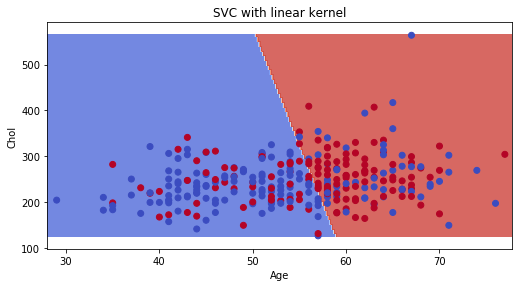

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

col1, col2 = 'Age', 'Chol'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)


plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()


In [32]:
C=1.0
X_scaled = preprocessing.scale(X)

In [33]:
svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled, y)

In [34]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)

In [35]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)

In [36]:
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

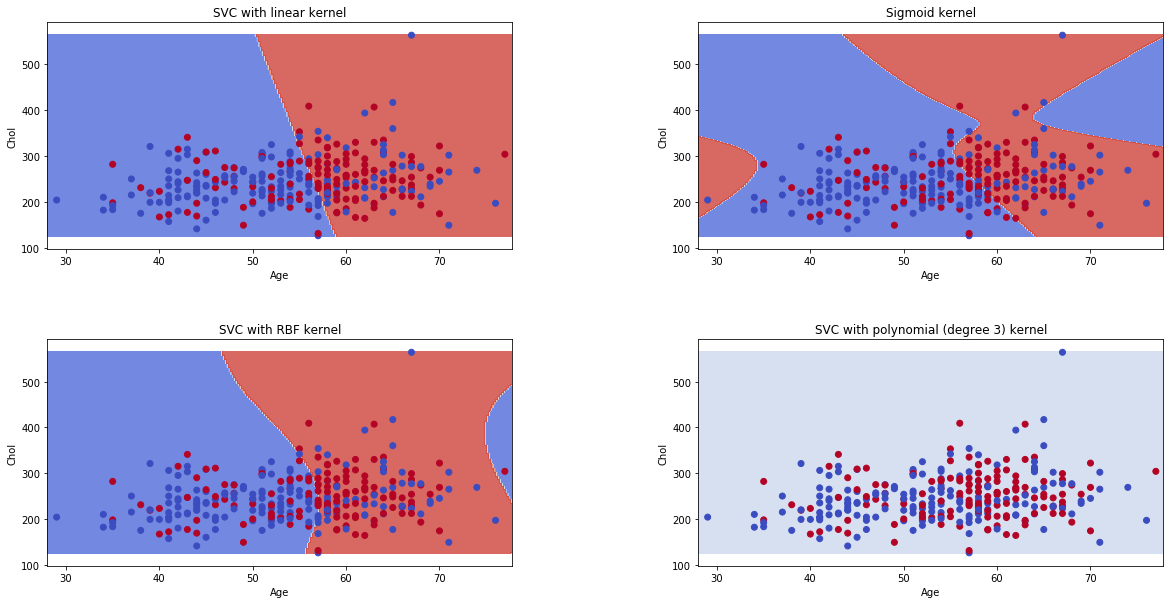

In [37]:
# title for the plots
titles = ['SVC with linear kernel',
          'Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

# Assignment

## 1. Convert all columns into new numerical feature columns


In [328]:
# ChestPain
heart.ChestPain.unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'], dtype=object)

In [329]:
def chestpain(c):
    if c == "typical":
        return 1
    elif c == "asymptomatic":
        return 2
    elif c == "nonanginal":
        return 3
    elif c == "nontypical":
        return 0

heart.ChestPain.apply(chestpain).head()


0    1
1    2
2    2
3    3
4    0
Name: ChestPain, dtype: int64

In [330]:
heart['cp_num'] = heart.ChestPain.apply(chestpain)
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,cp_num,thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,2


In [331]:
# # Thal
# # heart.Thal.unique()
# thal_options = list(heart.Thal.fillna('unknown').unique())
# print(thal_options)
# heart['thal_num'] = heart.Thal.fillna('unknown').map(thal_options.index)

In [332]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,cp_num,thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,2


In [333]:
def thal(t):
    if t == "fixed":
        return 1
    elif t == "normal":
        return 2
    elif t == "reversable":
        return 3
    elif t == "nan":
        return 0

heart.Thal.apply(thal).head()


0    1.0
1    2.0
2    3.0
3    2.0
4    2.0
Name: Thal, dtype: float64

In [334]:
heart['thal_num'] = np.nan_to_num(heart.Thal.apply(thal))
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,cp_num,thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,1,1.0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,2.0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3.0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,2.0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,2.0


In [335]:
heart.thal_num.unique()

array([ 1.,  2.,  3.,  0.])

In [336]:
heart['thal_num'] = heart.thal_num.astype(np.int)

In [337]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,cp_num,thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,2


## 2. Using all the numerical columns: 
### a) fit a model and plot the resulting predictions. 

Generating: Age vs Sex
Generating: Chol vs RestBP
Generating: thal_num vs Oldpeak
Generating: cp_num vs MaxHR


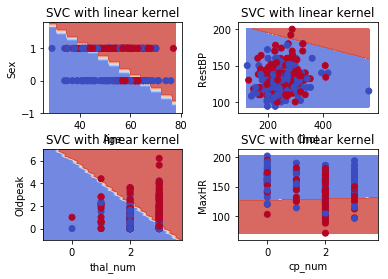

In [338]:
col1_features = ['Age','Chol','thal_num', 'cp_num']
col2_features = ['Sex','RestBP', 'Oldpeak', 'MaxHR']


for i, (col1, col2) in enumerate(zip(col1_features, col2_features)):
    print('Generating: {} vs {}'.format(col1,col2))
    X = heart[[col1,col2]]
    y = heart['ahd_num']
    
    svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
    plot_svm(i, svc,'SVC with linear kernel' , X, y, col1, col2)
#     plot_svm_nogrid(i, svc,'SVC with linear kernel' , X, y, features[0], features[1])

plt.show()

In [339]:
# def plot_svm_nogrid(i, clf, title, X, y, col1, col2):
    
#     h = .2  # step size in the mesh
#     # create a mesh to plot in
#     x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
#     y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

#     x1 = X[col1]
#     x2 = X[col2]
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     plt.subplot(2, 2, i + 1)
#     plt.subplots_adjust(wspace=0.4, hspace=0.4)

# #     Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
# #     # Put the result into a color plot
# #     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# #     x_s = preprocessing.scale(X)

#     # Plot also the training points
#     plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
#     plt.xlabel(col1)
#     plt.ylabel(col2)
#     plt.title(title)
    
# plot_svm_nogrid(0, svc,'SVC with linear kernel' , X, y, features[0], features[1])

# features = ['Age','Chol','thal_num', 'cp_num', 'MaxHR']
# features = ['Age','Chol', 'thal_num']
# X = heart[features]

heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,cp_num,thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,2


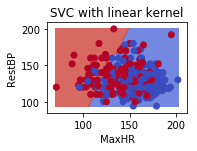

In [340]:
col1, col2 = 'MaxHR', 'RestBP'

X = heart[[col1, col2]]
y = heart['ahd_num']
# print(X.shape)

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
plt.show()

In [201]:
# col1, col2 = 'cp_num', 'thal_num'

# X = heart[[col1, col2]]
# y = heart['ahd_num']
# # print(X.shape)

# # we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
# svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

In [202]:
# col1, col2 = 'Fbs', 'RestECG'

# X = heart[[col1, col2]]
# y = heart['ahd_num']
# # print(X.shape)

# # we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
# svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

In [203]:
# col1, col2 = 'Chol','ExAng' 

# X = heart[[col1, col2]]
# y = heart['ahd_num']
# # print(X.shape)

# # we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
# svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

# # This particular graph does not have the line going through any points, so seems unhelpful to plot.

In [198]:
# col1, col2 = 'Oldpeak','Slope' 

# X = heart[[col1, col2]]
# y = heart['ahd_num']
# # print(X.shape)

# # we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
# svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

In [146]:
# col1, col2 = 'Age','Ca' 

# X = heart[[col1, col2]]
# y = heart['ahd_num']
# # print(X.shape)

# # we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
# svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

# # Cannot plot due to Nan values

### b) count the number of correct Yes prediction and No prediction along with the number of Wrong Yes/No and store them into a dictionary  (see Confusion Matrix for more details).

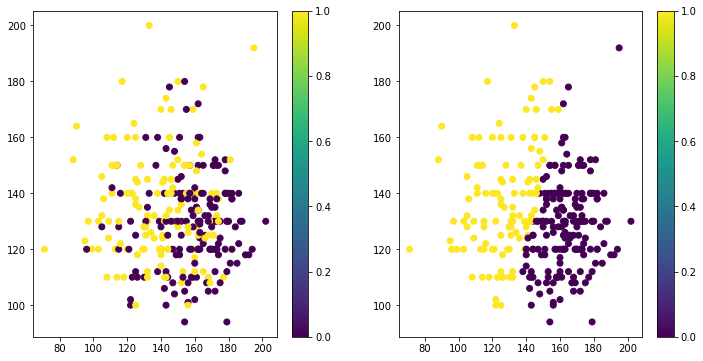

In [341]:
col1, col2 = 'MaxHR', 'RestBP'

X = heart[[col1, col2]]
y = heart['ahd_num']
# print(X.shape)

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)
# plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sca = plt.scatter(X[col1], X[col2], c=y, vmin=0, vmax=1)
plt.colorbar(sca)


z = svc.predict(scale(X))

plt.subplot(1,2,2)
sca = plt.scatter(X[col1], X[col2], c=z, vmin=0, vmax=1)
plt.colorbar(sca)

In [342]:
y.head().values, z[:5]

(array([0, 1, 1, 0, 0]), array([0, 1, 1, 0, 0]))

In [343]:
# y: actual values
# z: predicted values

# Confusion matrix:
# True positives
# tp = sum((y.head() == True) & (z[:5] == True))
tp = sum((y == True) & (z == True))
# print(tp)

# True negatives
# tn = sum((y.head() == False) & (z[:5] == False))
tn = sum((y == False) & (z == False))
# print(tn)

# False positives
# fp = sum((y.head() == False) & (z[:5] == True))
fp = sum((y == False) & (z == True))
# print(fp)

# False negatives
# fn = sum((y.head() == True) & (z[:5] == False))
fn = sum((y == True) & (z == False))
# print(fn)

confusion_dict = {'false positives': fp, 'false negatives': fn, 'true negatives': tn, 'true positives': tp,}

print(confusion_dict)

{'false positives': 32, 'false negatives': 58, 'true negatives': 132, 'true positives': 81}


In [344]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y,z)
print(confusion_mat)

[[132  32]
 [ 58  81]]


### c) repeat this for all the possible Kernels and vary your polynomial degrees

In [345]:
# Repeat for all possible kernels

C=1.0
X_scaled = preprocessing.scale(X)

svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled, y)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)

poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)

sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

kernels = [svc, rbf_svc, poly_svc, sig_svc]
confusion_dicts = []

for kernel in kernels:

    
#     predicted values
    z = kernel.predict(X_scaled)
#     compared predicted values with actual values
    tp = sum((y == True) & (z == True))
    tn = sum((y == False) & (z == False))
    fp = sum((y == False) & (z == True))
    fn = sum((y == True) & (z == False))
#     create dictionary
    confusion_dict = {'kernel': kernel.kernel,'false positives': fp, 'false negatives': fn, 'true negatives': tn, 'true positives': tp,}
#     print(kernel)
    print(confusion_dict)
#     confusion_mat = confusion_matrix(y,z)
#     print(confusion_mat)
    confusion_dicts.append(confusion_dict)
    print(confusion_dicts)

{'kernel': 'linear', 'false positives': 32, 'false negatives': 58, 'true negatives': 132, 'true positives': 81}
[{'kernel': 'linear', 'false positives': 32, 'false negatives': 58, 'true negatives': 132, 'true positives': 81}]
{'kernel': 'rbf', 'false positives': 36, 'false negatives': 48, 'true negatives': 128, 'true positives': 91}
[{'kernel': 'linear', 'false positives': 32, 'false negatives': 58, 'true negatives': 132, 'true positives': 81}, {'kernel': 'rbf', 'false positives': 36, 'false negatives': 48, 'true negatives': 128, 'true positives': 91}]
{'kernel': 'poly', 'false positives': 3, 'false negatives': 126, 'true negatives': 161, 'true positives': 13}
[{'kernel': 'linear', 'false positives': 32, 'false negatives': 58, 'true negatives': 132, 'true positives': 81}, {'kernel': 'rbf', 'false positives': 36, 'false negatives': 48, 'true negatives': 128, 'true positives': 91}, {'kernel': 'poly', 'false positives': 3, 'false negatives': 126, 'true negatives': 161, 'true positives': 1

In [346]:
#  Vary the polynomial degrees

degrees = list(range(1,15))
print(degrees)

for degree in degrees:
#     run model with varying degrees
    poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X_scaled, y)
#     predicted values
    z = poly_svc.predict(X_scaled)
#     compared predicted values with actual values
    tp = sum((y == True) & (z == True))
    tn = sum((y == False) & (z == False))
    fp = sum((y == False) & (z == True))
    fn = sum((y == True) & (z == False))
#     create dictionary
    poly_degree = 'poly_{degree}'.format(degree = degree)
    confusion_dict = {'kernel': poly_degree,'true negatives': tn, 'false positives': fp, 'false negatives': fn, 'true positives': tp}
    print(degree, confusion_dict)
    confusion_mat = confusion_matrix(y,z)
    print(confusion_mat)
    confusion_dicts.append(confusion_dict)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1 {'kernel': 'poly_1', 'true negatives': 131, 'false positives': 33, 'false negatives': 57, 'true positives': 82}
[[131  33]
 [ 57  82]]
2 {'kernel': 'poly_2', 'true negatives': 161, 'false positives': 3, 'false negatives': 126, 'true positives': 13}
[[161   3]
 [126  13]]
3 {'kernel': 'poly_3', 'true negatives': 152, 'false positives': 12, 'false negatives': 101, 'true positives': 38}
[[152  12]
 [101  38]]
4 {'kernel': 'poly_4', 'true negatives': 161, 'false positives': 3, 'false negatives': 121, 'true positives': 18}
[[161   3]
 [121  18]]
5 {'kernel': 'poly_5', 'true negatives': 157, 'false positives': 7, 'false negatives': 108, 'true positives': 31}
[[157   7]
 [108  31]]
6 {'kernel': 'poly_6', 'true negatives': 161, 'false positives': 3, 'false negatives': 124, 'true positives': 15}
[[161   3]
 [124  15]]
7 {'kernel': 'poly_7', 'true negatives': 159, 'false positives': 5, 'false negatives': 110, 'true positives': 29}
[[159   5]
 [11

In [347]:
confusion_dicts[:2]

[{'false negatives': 58,
  'false positives': 32,
  'kernel': 'linear',
  'true negatives': 132,
  'true positives': 81},
 {'false negatives': 48,
  'false positives': 36,
  'kernel': 'rbf',
  'true negatives': 128,
  'true positives': 91}]

## 3. Using the dictionary into a pandas DataFrame, display the results


In [356]:
df = pd.DataFrame(confusion_dicts)
df

,false negatives,false positives,kernel,true negatives,true positives
0,58,32,linear,132,81
1,48,36,rbf,128,91
2,126,3,poly,161,13
3,61,61,sigmoid,103,78
4,57,33,poly_1,131,82
5,126,3,poly_2,161,13
6,101,12,poly_3,152,38
7,121,3,poly_4,161,18
8,108,7,poly_5,157,31
9,124,3,poly_6,161,15


## 4. Repeat this process with a 65/35 Train/Test Split and using the Test Set for your prediction metrics

In [349]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.65)

In [350]:
X_train.shape, y_train.shape

((106, 2), (106,))

In [351]:
# Repeat for all possible kernels

C=1.0
X_scaled = preprocessing.scale(X)

svc = svm.SVC(kernel='linear', C=1.0).fit(X_train, y_train)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)

poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_train, y_train)

sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_train, y_train)

kernels = [svc, rbf_svc, poly_svc, sig_svc]
confusion_dicts_65_35_split = []

for kernel in kernels:
    
#     predicted values
    z = kernel.predict(X_test)
#     compared predicted values with actual values
    tp = sum((y_test == True) & (z == True))
    tn = sum((y_test == False) & (z == False))
    fp = sum((y_test == False) & (z == True))
    fn = sum((y_test == True) & (z == False))
#     create dictionary
    confusion_dict_65_35_split = {'kernel': kernel.kernel,'false positives': fp, 'false negatives': fn, 'true negatives': tn, 'true positives': tp,}

    print(confusion_dict_65_35_split)
    confusion_dicts_65_35_split.append(confusion_dict_65_35_split)

{'kernel': 'linear', 'false positives': 20, 'false negatives': 44, 'true negatives': 85, 'true positives': 48}
{'kernel': 'rbf', 'false positives': 22, 'false negatives': 42, 'true negatives': 83, 'true positives': 50}
{'kernel': 'poly', 'false positives': 5, 'false negatives': 85, 'true negatives': 100, 'true positives': 7}
{'kernel': 'sigmoid', 'false positives': 29, 'false negatives': 45, 'true negatives': 76, 'true positives': 47}


In [352]:
#  Vary the polynomial degrees

degrees = list(range(1,15))
print(degrees)

for degree in degrees:
#     run model with varying degrees
    poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X_train, y_train)
#     predicted values
    z = poly_svc.predict(X_test)
#     compared predicted values with actual values
    tp = sum((y_test == True) & (z == True))
    tn = sum((y_test == False) & (z == False))
    fp = sum((y_test == False) & (z == True))
    fn = sum((y_test == True) & (z == False))
#     create dictionary
    poly_degree = 'poly_{degree}'.format(degree = degree)
    confusion_dict_65_35_split = {'kernel': poly_degree,'true negatives': tn, 'false positives': fp, 'false negatives': fn, 'true positives': tp}
    print(degree, confusion_dict_65_35_split)
    confusion_mat = confusion_matrix(y_test,z)
#     print(confusion_mat)
    confusion_dicts_65_35_split.append(confusion_dict_65_35_split)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1 {'kernel': 'poly_1', 'true negatives': 84, 'false positives': 21, 'false negatives': 43, 'true positives': 49}
2 {'kernel': 'poly_2', 'true negatives': 100, 'false positives': 5, 'false negatives': 85, 'true positives': 7}
3 {'kernel': 'poly_3', 'true negatives': 102, 'false positives': 3, 'false negatives': 75, 'true positives': 17}
4 {'kernel': 'poly_4', 'true negatives': 99, 'false positives': 6, 'false negatives': 77, 'true positives': 15}
5 {'kernel': 'poly_5', 'true negatives': 100, 'false positives': 5, 'false negatives': 75, 'true positives': 17}
6 {'kernel': 'poly_6', 'true negatives': 102, 'false positives': 3, 'false negatives': 81, 'true positives': 11}
7 {'kernel': 'poly_7', 'true negatives': 99, 'false positives': 6, 'false negatives': 76, 'true positives': 16}
8 {'kernel': 'poly_8', 'true negatives': 93, 'false positives': 12, 'false negatives': 74, 'true positives': 18}
9 {'kernel': 'poly_9', 'true negatives': 98, 'false

In [353]:
df = pd.DataFrame(confusion_dicts_65_35_split)
df

,false negatives,false positives,kernel,true negatives,true positives
0,44,20,linear,85,48
1,42,22,rbf,83,50
2,85,5,poly,100,7
3,45,29,sigmoid,76,47
4,43,21,poly_1,84,49
5,85,5,poly_2,100,7
6,75,3,poly_3,102,17
7,77,6,poly_4,99,15
8,75,5,poly_5,100,17
9,81,3,poly_6,102,11
